In [30]:
import pandas as pd
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


if __name__ == '__main__':
    # load the dataset
    df = pd.read_parquet('Kaebyok_pre.parquet')
    # create the dictionary and corpus
    text_data = df["corpus"].to_list()
    id2word = Dictionary(text_data)
    corpus = [id2word.doc2bow(text) for text in text_data]

    # create the LDA model
    num_topics = 50
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, alpha='auto', per_word_topics=True, random_state=42)

KeyboardInterrupt: 

In [ ]:
from textacy.representations import Vectorizer
import matplotlib.pyplot as plt
import json # write to disk
import pandas as pd
import gensim
%matplotlib inline
# nlp = spacy.load("en") # Download spacy english vocabulary: `python -m spacy download en`

import os, re, sys
import warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [ ]:
df = pd.read_parquet('Kaebyok.parquet')
# create the dictionary and corpus
text_data = df["Corpus"].astype(str).to_list()

bigram = gensim.models.Phrases(text_data, min_count=50, threshold=5, max_vocab_size=50000)
trigram = gensim.models.Phrases(bigram[text_data], min_count=50, threshold=5, max_vocab_size=50000)
docs_phrased = [" ".join(trigram[bigram[doc.split()]]) for doc in text_data]
print(str(len(docs_phrased)) +' : '+ docs_phrased[0][:400])

In [35]:
df = pd.read_parquet('Kaebyok_pre.parquet')

# for b, y in x:
#     cols = [f'Topic {i+1}' for i in range(16)]
#     tops[cols[b]] = [y] 
#     # df.index = pd.MultiIndex.from_tuples(df.index, names=cols[:-1])
#     # df = df.reset_index()
# df = pd.DataFrame(tops)
# df

def get_topic(row):
    tops = {}
    bow = id2word.doc2bow(row)
    x = lda_model.get_document_topics(bow, minimum_probability=0)
    for b, y in x:
        cols = [f'Topic {i+1}' for i in range(num_topics)]
        tops[cols[b]] = y
    return tops

topics_df = df['corpus'].apply(lambda x: pd.Series(get_topic(x)))
df = pd.concat([df, topics_df], axis=1)
df

,date,articleNo,title,author,text,corpus,lemmas,Topic 1,Topic 2,Topic 3,Topic 4
0,1920-06-25,1920-06-25_1,謝告,none,"謝告\n本 開闢 創刊號 中力萬能主義의 題末에 「금쌀악, 옥가루」와 檀君神話의 末段 ...","[謝告, 開闢, 創刊號, 中力萬能主義, 題末, 가루, 檀君神話, 末段, 二行, 다음...","[謝告, 本, 開闢, 創刊號, 中力萬能主義, 의, 題末, 에, 「, 금, 싸, ㄹ,...",0.227326,0.043324,0.242085,0.487265
1,1920-06-25,1920-06-25_2,권두시,none,아- 風雲! 아- 霹靂!!\n모래가 날리며 돍이 닷도다.\n나무가 부러지며 풀이 쓸...,"[風雲, 霹靂, 모래, 나무, 풀이, 黑天地, 修羅場, 이로, 混沌, 銃創, 殺到,...","[아, 아, -, 風雲, !, 아, 아, -, 霹靂, !!, 모래, 가, 날리, 며...",0.416755,0.415444,0.158778,0.009023
2,1920-06-25,1920-06-25_3,創刊辭,none,創刊辭\n소리-있어 넓히 世界에 傳하니 온 世界 모든 人類-이에 應하야 부르짖기를 ...,"[創刊辭, 소리, 世界, 世界, 人類, 始作, 强者, 弱者, 優者, 劣者, 東西南北...","[創刊辭, 소리, -, 있, 어, 넓히, 世界, 에, 傳, 하, 니, 온, 世界, ...",0.189745,0.493443,0.313748,0.003064
3,1920-06-25,1920-06-25_4,世界를 알라,none,世界를 알라\n一\n사람은 天使도 안이며 野獸도 안이오 오즉 사람일 뿐이로다. 이만...,"[世界, 사람, 天使, 野獸, 사람, 이만치, 進化, 體格, 이만치, 進化, 知識,...","[世界, 를, 알, ㄹ라, 一, 사람, 은, 天使, 도, 안, 이, 며, 野獸, 도...",0.134378,0.656605,0.127206,0.081811
4,1920-06-25,1920-06-25_5,최근 朝鮮에서 起하는 各種의 新現象,李敦化,최근 朝鮮에서 起하는 各種의 新現象\n李敦化\n改造의 소리가 널리 世界에 宣布한 以...,"[최근, 朝鮮, 各種, 新現象, 李敦化, 改造, 소리, 世界, 宣布, 以來, 處士,...","[최근, 朝鮮, 에서, 起, 하, 는, 各種, 의, 新現象, 李敦化, 改造, 의, ...",0.053821,0.473973,0.258976,0.213230
...,...,...,...,...,...,...,...,...,...,...,...
2467,1935-03-01,1935-03-01_2468,中篇 巨人(2),金東仁,中篇 巨人\n金東仁\n「前號의 梗槪= 세종대왕의 맛아드님 세자는 그 마음으로던 몸으...,"[中篇, 巨人, 金東仁, 前號, 梗槪, 세종, 대왕, 아드님, 세자, 마음, 부족,...","[中篇, 巨人, 金東仁, 「, 前號, 의, 梗槪, =, 세종, 대왕, 의, 맛, 아...",0.671086,0.007090,0.000273,0.321551
2468,1935-03-01,1935-03-01_2469,脫線,朴鄕民,脫線\n朴鄕民\n(86-89면 원본 낙장 - 국편),"[脫線, 朴鄕民, 86-89, 원본, 낙장]","[脫線, 朴鄕民, (, 86-89, 면, 원본, 낙장, -, 국, 편, )]",0.460774,0.053433,0.053573,0.432220
2469,1935-03-01,1935-03-01_2470,編輯餘墨,none,"編輯餘墨\n이번 號는 特히 『新聞批判號』로 꿈엿다. 自稱 民衆의 公器요, 社會의 ...","[編輯餘墨, 이번, 新聞批判號, 自稱, 民衆, 公器, 社會, 木鐸, 新聞, 環境, ...","[編輯餘墨, 이번, 號, 는, 特, 히, 『, 新聞批判號, 』, 로, 꿈, 엿, 다...",0.194751,0.299920,0.239336,0.265992
2470,1935-03-01,1935-03-01_2471,謹告,none,謹告\n『어린이』 續刊 三月號는 不幸히 當局에 押收를 當하엿습니다\n그래서 不得已 ...,"[謹告, 어린이, 續刊, 三月號, 不幸, 當局, 押收, 不得已, 三月號, 發行, 四...","[謹告, 『, 어린이, 』, 續刊, 三月號, 는, 不幸, 히, 當局, 에, 押收, ...",0.021288,0.196662,0.485188,0.296863


In [24]:
lda_model.show_topic(5)

AttributeError: 'EnsembleLda' object has no attribute 'show_topic'

In [ ]:
file = 'Kaebyok_modeled_20230223-1124.parquet'
df = pd.read_parquet(file)
highest_topic3_index = df['Topic 8'].idxmax()
highest_topic3_row = df.loc[highest_topic3_index]
print(highest_topic3_row['Text'])


In [34]:
lda_model = lda_model.generate_gensim_representation()
x = lda_model.show_topics(num_topics=num_topics, formatted=False)
sorted(x)

[(0,
  [('사람', 0.029654607),
   ('생각', 0.019304939),
   ('소리', 0.016124435),
   ('마음', 0.010432995),
   ('무엇', 0.007547993),
   ('모양', 0.006702112),
   ('머리', 0.006406542),
   ('사랑', 0.005981467),
   ('이러', 0.0059074266),
   ('동안', 0.0054001813)]),
 (1,
  [('先生', 0.086582184),
   ('네쓰', 0.0070107467),
   ('하다', 0.0049082916),
   ('當時', 0.0047119497),
   ('朝廷', 0.0042682784),
   ('아쓰', 0.0025968214),
   ('偉人', 0.0024515977),
   ('지방', 0.0024118202),
   ('朝鮮', 0.002411431),
   ('日本', 0.0022260626)]),
 (2,
  [('하다', 0.056023665),
   ('日本', 0.012904588),
   ('中國', 0.011486829),
   ('京城', 0.010290505),
   ('開催', 0.0057102675),
   ('組織', 0.004677475),
   ('可決', 0.0035861626),
   ('餘名', 0.0034325866),
   ('朝鮮', 0.003309043),
   ('仝日', 0.0033030873)]),
 (3,
  [('순복', 0.06161341),
   ('아해', 0.022514874),
   ('만주', 0.021586932),
   ('정애', 0.014356661),
   ('기복', 0.010565927),
   ('자식', 0.0092850765),
   ('이의', 0.007850374),
   ('싸움', 0.0073556774),
   ('칠성', 0.0070428457),
   ('학교', 0.004890769)

In [41]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
lda_viz

/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.296170  0.094274       1        1  38.235090
3     -0.060599  0.004816       2        1  26.483611
1      0.075025 -0.271534       3        1  20.553061
2      0.281743  0.172444       4        1  14.728237, topic_info=       Term          Freq         Total Category  logprob  loglift
681      先生  28598.000000  28598.000000  Default  30.0000  30.0000
163677   순복  26106.000000  26106.000000  Default  29.0000  29.0000
615      하다  16033.000000  16033.000000  Default  28.0000  28.0000
79399    만주   9169.000000   9169.000000  Default  27.0000  27.0000
5568     아해  10186.000000  10186.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
10478    東京    742.729645   1144.354712   Topic4  -5.7591   1.4831
876      朝鮮    779.280900   1841.314528   Topic4  -5.7111   1.0555
19789    露國    499.051119    579.360318   Topic4  -6.1568   1.7662
354      政府    497.283071    594.937416   Topic4  -6.1603   1.7361
736      問題    498.245970    669.297375   Topic4  -6.1584   1.6203

[300 rows x 6 columns], token_table=        Topic      Freq Term
term                        
34776       2  0.004824   丁酉
34776       3  0.993759   丁酉
1172        2  0.002673   上下
1172        3  0.994293   上下
13741       1  0.048302   上海
...       ...       ...  ...
1519        1  0.939807   혼자
1519        2  0.041257   혼자
1519        3  0.018753   혼자
1519        4  0.000536   혼자
157358      2  1.000436   휴일

[712 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from datetime import datetime as dt


# Group the data by date and calculate the sum of topic values
grouped_df = df.groupby('Date').sum()

# Create a list of all topic names
topic_names = [f'Topic {i}' for i in range(1, 17)]

# Create the app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.Label('Select a topic:'),
    dcc.Dropdown(
        id='topic-dropdown',
        options=[{'label': topic_name, 'value': topic_name} for topic_name in topic_names],
        value='Topic 3'
    ),
    dcc.Graph(id='topic-graph')
])

# Define the app callback
@app.callback(
    dash.dependencies.Output('topic-graph', 'figure'),
    [dash.dependencies.Input('topic-dropdown', 'value')]
)
def update_figure(selected_topic):
    # Create the figure layout
    fig = go.Figure()

    # Loop through each topic and add a line trace to the figure
    for i, topic_name in enumerate(topic_names):
        # Create a line trace for the topic
        trace = go.Scatter(x=grouped_df.index, y=grouped_df[topic_name], name=topic_name, line={'color': 'lightgrey'}, opacity=0.2) # , 'opacity': 0.2
        # If this is the selected topic, set the line color to dark red
        if topic_name == selected_topic:
            # trace.line.color = 'darkred'
            trace = go.Scatter(x=grouped_df.index, y=grouped_df[topic_name], name=topic_name, line={'color': 'darkred'},  opacity=1)
        # Add the trace to the figure
        fig.add_trace(trace)

    # Update the figure layout
    fig.update_layout(
        title='Topic Values Over Time',
        xaxis_title='Date',
        yaxis_title='Topic Value',
        yaxis_tickformat='s',
        hovermode='x unified',
        legend_title='Topic',
        plot_bgcolor='white'
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(port=8962)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from datetime import datetime as dt
from gensim.models.ldamodel import LdaModel


# Load the LDA model and get the list of topic names and their top words
lda_model = LdaModel.load('lda_model_tops16_ps1_20230223-1124')
topic_names = [f'Topic {i+1}' for i in range(lda_model.num_topics)]
topic_words = [sorted(lda_model.show_topic(i, topn=5)) for i in range(lda_model.num_topics)]


# Group the data by date and calculate the sum of topic values
file = 'Kaebyok_modeled_20230223-1124.parquet'
df = pd.read_parquet(file)
grouped_df = df.groupby('Date').sum()

# Create the app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.Label('Select a topic:'),
    dcc.Dropdown(
        id='topic-dropdown',
        options=[{'label': topic_name, 'value': topic_name} for topic_name in topic_names],
        value='Topic 3'
    ),
    dcc.Graph(id='topic-graph')
])

# Define the app callback
@app.callback(
    dash.dependencies.Output('topic-graph', 'figure'),
    [dash.dependencies.Input('topic-dropdown', 'value')]
)
def update_figure(selected_topic):
    # Create the figure layout
    fig = go.Figure()

    # Loop through each topic and add a line trace to the figure
    for i, topic_name in enumerate(topic_names):
        # Create a line trace for the topic
        trace = go.Scatter(x=grouped_df.index, y=grouped_df[topic_name], name=topic_name, line={'color': 'lightgrey'}, opacity=0.2, hovertemplate='<b>%{y:.2f}</b><br><br>Top Words:<br>'+ '<br>'.join([f"{word[0]} ({word[1]:.2f})" for word in topic_words[i]])) # add hovertemplate to show the top words for each topic
        # If this is the selected topic, set the line color to dark red
        if topic_name == selected_topic:
            trace = go.Scatter(x=grouped_df.index, y=grouped_df[topic_name], name=topic_name, line={'color': 'darkred'}, opacity=1, hovertemplate='<b>%{y:.2f}</b><br><br>Top Words:<br>'+ '<br>'.join([f"{word[0]} ({word[1]:.2f})" for word in topic_words[i]])) # add hovertemplate to show the top words for each topic
        # Add the trace to the figure
        fig.add_trace(trace)

    # Update the figure layout
    fig.update_layout(
        title='Topic Values Over Time',
        xaxis_title='Date',
        yaxis_title='Topic Value',
        yaxis_tickformat='s',
        hovermode='x unified',
        legend_title='Topic',
        plot_bgcolor='white'
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(port=8968)


In [ ]:
dfy = df.loc[df['author'] == '一記者']
# dfy = dfy.groupby('date').mean()
dfy

In [ ]:
import infodynamics
import metrics
import pandas as pd

# file = 'Kaebyok_modeled_20230223-1124.parquet'
# df = pd.read_parquet(file)
dfy = df.loc[df['author'] == '李光洙']
dfy = dfy.groupby('date').mean()
print(dfy.head())

timestamps = dfy.index.tolist()

im = infodynamics.InfoDynamics(dfy, timestamps, window=10)
x = im.fit_return(meas=metrics.jsd)
dfx = pd.DataFrame(x, index=timestamps)
dfx.plot(y = ['novelty', 'resonance'])

In [ ]:
lda_model.get_term_topics('개조',minimum_probability=0)

In [ ]:
dfr = df.loc[df['Topic 12'] > 0.1].groupby('author').mean().value_counts('author')
dfr

In [ ]:
len(df.loc[df['author'] == '達成抄'])

In [ ]:
import pandas as pd
import pandas_profiling
# Generate the pandas profiling report
profile = pandas_profiling.ProfileReport(df)

# Generate the HTML report
profile.to_file("profile_output.html")


findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not found.
findfont: Font family 'Batang' not

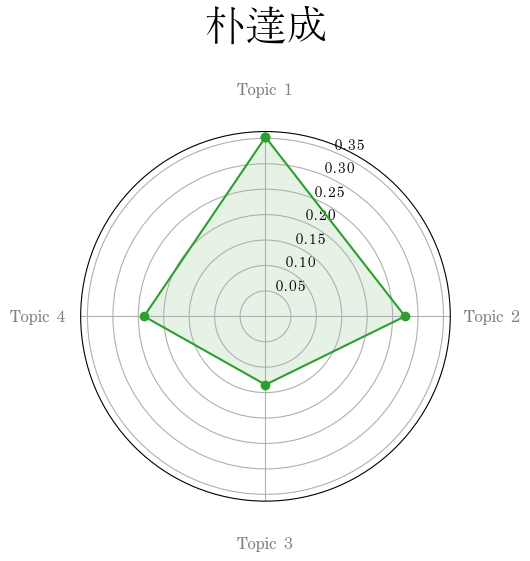

In [40]:
# Radar chart
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = ['AppleMyungjo','Batang']
# fig = plt.figure(figsize=(30, 30)) # Change the values of figsize to increase or decrease the diameter of the radar chart


lookup = '朴達成'
grouped_df = df.loc[df['author'] == f'{lookup}'].groupby('author').mean(numeric_only=True).reset_index().T.iloc[1:].reset_index()
grouped_df.columns = ['topics', 'values']
grouped_df = grouped_df.loc[(grouped_df['values'] >= 0.01)]

fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(grouped_df) + 1) / float(len(grouped_df)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = grouped_df['values'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="values")
plt.xticks(theta[:-1], grouped_df['topics'], color='grey', size=12)
ax.tick_params(pad=20) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
# ax.fill_between(
#     np.linspace(-.5, np.pi/5, 100),  # Go from 0 to pi/2
#     0,                          # Fill from radius 0
    
#     values.max(),
#     alpha=0.2,
#     color='r'
# )

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title(f"{lookup}", pad=30, fontsize=30)
plt.show()

In [ ]:
# Radar chart
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = ['AppleMyungjo','Batang']
# fig = plt.figure(figsize=(30, 30)) # Change the values of figsize to increase or decrease the diameter of the radar chart


lookup = '春坡'
grouped_df = df.loc[df['author'] == f'{lookup}'].groupby('author').mean(numeric_only=True).reset_index().T.iloc[1:].reset_index()
grouped_df.columns = ['topics', 'values']
grouped_df = grouped_df.loc[(grouped_df['values'] >= 0.01)]

fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(grouped_df) + 1) / float(len(grouped_df)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = grouped_df['values'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
cmap = plt.get_cmap('Greens')
l1, = ax.plot(theta, values, color=cmap(0.8), marker="o", markersize=10, linewidth=2, label="values")
plt.xticks(theta[:-1], grouped_df['topics'], color='grey', size=12)
# Add axis labels
ax.tick_params(pad=20) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title(f"{lookup}", pad=30, fontsize=30)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import Levenshtein

# Create example dataframe with usernames
df = pd.read_parquet('Kaebyok_pre.parquet')
# Define similarity threshold
threshold = 0.8

# Define function to calculate similarity between two strings
def similarity(s1, s2):
    return Levenshtein.ratio(s1, s2)

# Define function to group similar usernames
def group_similar_usernames(usernames):
    groups = []
    for i, username in enumerate(usernames):
        group_found = False
        for group in groups:
            if any(similarity(username, member) >= threshold for member in group):
                group.append(username)
                group_found = True
                break
        if not group_found:
            groups.append([username])
    return groups

# Group similar usernames
grouped_usernames = group_similar_usernames(df['author'])

# Print groups
for group in grouped_usernames:
    if len(set(group)) > 1:
        print(set(group))


In [ ]:
dfyt['author']

In [ ]:
dft = pd.read_parquet('Kaebyok_pre.parquet')
dft['author'].value_counts()

# search_list = ['朴達成', '達成抄', '達成']
# xy = dft['author'].value_counts()
# filtered_counts = xy[search_list]
# print(filtered_counts)


def merge_authors(df):
    dfx = df
    for group in grouped_usernames:
        search_list = set(group)
        most_common = dfx['author'].value_counts()[search_list].keys()[0]
        dfx['author'].replace(search_list, most_common, inplace=True)
    return dfx

dfyt = merge_authors(dft)

# dft['author'].value_counts()
dfyt['author'].value_counts()

In [ ]:
dft = pd.read_parquet('Kaebyok_pre.parquet')
dft['author'].value_counts()[2:].plot()

In [ ]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch

def imagegeneration(prompt:str, filename:str, guidancescale:float=7.5, num_steps:int=50):
    # set model id to SD 2.1
    model_id = "stabilityai/stable-diffusion-2-1"
    # starts Diffusion Pipeline
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    # sets method noise > image with base config
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    # sends pipeline to cuda
    pipe = pipe.to("cuda")
    # prompts the image
    image = pipe(prompt=prompt, guidance_scale=guidancescale, num_inference_steps=num_steps).images[0]
    # saves the image
    image.save(f'{filename}.png')
    # returns so result is visable in notebook
    return image

#BErtopic

In [48]:
from sklearn.datasets import fetch_20newsgroups

docs1 = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [63]:
from bertopic import BERTopic
import pandas as pd
from transformers.pipelines import pipeline

embedding_model = pipeline("feature-extraction", model="kakaobrain/kogpt", revision='KoGPT6B-ryan1.5b-float16')
topic_model = BERTopic(embedding_model=embedding_model)
dft = pd.read_parquet('Kaebyok_pre.parquet')
docs = dft['corpus'].to_list()


In [56]:
docs = [item for items in docs for item in items]


['謝告',
 '開闢',
 '創刊號',
 '中力萬能主義',
 '題末',
 '가루',
 '檀君神話',
 '末段',
 '二行',
 '다음',
 '막시',
 '마쓰',
 '格言',
 '臣下',
 '懇請',
 '答言',
 '靑吾君',
 '漢詩',
 '小說',
 '流帆',
 '모도',
 '다음',
 '四行',
 '小說槪要',
 '題末',
 '二行',
 '當局',
 '忌諱',
 '創刊號',
 '發賣頒布',
 '禁止',
 '忌諱點',
 '削除',
 '號外',
 '發行',
 '自然',
 '時日',
 '遷延',
 '오니',
 '讀者',
 '事情',
 '恕諒',
 '開闢編輯室',
 '正誤',
 '本號外',
 '一三八頁',
 '平濟塔記事中',
 '興王寺',
 '王興寺',
 '風雲',
 '霹靂',
 '모래',
 '나무',
 '풀이',
 '黑天地',
 '修羅場',
 '이로',
 '混沌',
 '銃創',
 '殺到',
 '머리',
 '다리',
 '지도',
 '어지',
 '지도',
 '垓下野',
 '飜覆',
 '새바람',
 '일도',
 '世界',
 '燦爛',
 '世界',
 '平和',
 '소리',
 '改造',
 '人類',
 '新鮮',
 '自由',
 '人類',
 '開闢',
 '이로',
 '創刊辭',
 '소리',
 '世界',
 '世界',
 '人類',
 '始作',
 '强者',
 '弱者',
 '優者',
 '劣者',
 '東西南北',
 '四海八方',
 '소리',
 '霹靂',
 '地震',
 '神籟',
 '魔哭',
 '소리',
 '正邪',
 '判斷',
 '左右間',
 '多數',
 '渴仰',
 '多數',
 '要求',
 '人民',
 '소리',
 '임은',
 '明白',
 '哲人',
 '多數',
 '人民',
 '要求',
 '人民',
 '소리',
 '要求',
 '發表',
 '渴仰',
 '人民',
 '소리',
 '渴仰',
 '多數',
 '人民',
 '渴仰',
 '要求',
 '소리',
 '渴仰',
 '要求',
 '소리',
 '世界',
 '開闢',
 '소리',
 '無何有',
 '一物',
 '進化',
 '始作',
 '無有

In [57]:
topics, probs = topic_model.fit_transform(docs)

No sentence-transformers model found with name /Users/aron/.cache/torch/sentence_transformers/kakaobrain_kogpt. Creating a new one with MEAN pooling.


OSError: /Users/aron/.cache/torch/sentence_transformers/kakaobrain_kogpt does not appear to have a file named config.json. Checkout 'https://huggingface.co//Users/aron/.cache/torch/sentence_transformers/kakaobrain_kogpt/None' for available files.